# GlowCare Retail Sales Analysis
#### The primary objective of this analysis is to evaluate GlowCare’s retail sales performance across organized stores in Lagos between January 2023 and December 2025, in order to support data-driven commercial, operational, and strategic decisions.

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Loading the dataset

In [5]:
data = pd.read_csv("glowcare_lagos_retail_sales_2023_2025.csv")
data.head(5)


,sale_id,sale_date,year,month,store_name,location,store_type,product_name,category,quantity,unit_price,discount_amount,total_sales,cost_price,gross_profit,payment_method
0,SALE-100000,2025-05-10,2025,5,Jendol Ikorodu,Ikorodu,Superstore,GlowCare Body Scrub,Body Care,5,4200,500,20500,3000,5500,POS
1,SALE-100001,2024-04-11,2024,4,Justrite Akowonjo,Akowonjo,Supermarket,GlowCare Shower Gel,Bath Care,11,3800,1000,40800,2600,12200,Cash
2,SALE-100002,2025-05-21,2025,5,Justrite Ipaja Ayobo,Ipaja,Supermarket,GlowCare Shower Gel,Bath Care,6,3800,0,22800,2600,7200,POS
3,SALE-100003,2023-12-10,2023,12,GrandSquare Ikeja,Ikeja,Supermarket,GlowCare Face Cream,Skin Care,12,5200,0,62400,3600,19200,Cash
4,SALE-100004,2024-04-04,2024,4,Jendol Alakuko,Alakuko,Superstore,GlowCare Body Scrub,Body Care,12,4200,0,50400,3000,14400,Cash


### Checking the data

In [6]:
data.isnull().sum()

sale_id            0
sale_date          0
year               0
month              0
store_name         0
location           0
store_type         0
product_name       0
category           0
quantity           0
unit_price         0
discount_amount    0
total_sales        0
cost_price         0
gross_profit       0
payment_method     0
dtype: int64

In [7]:
data.dtypes

sale_id            object
sale_date          object
year                int64
month               int64
store_name         object
location           object
store_type         object
product_name       object
category           object
quantity            int64
unit_price          int64
discount_amount     int64
total_sales         int64
cost_price          int64
gross_profit        int64
payment_method     object
dtype: object

### Converting the 'sale_date' type from object to date format

In [9]:
data['sale_date'] = pd.to_datetime(data['sale_date'], format = "%Y-%m-%d")
data.dtypes

sale_id                    object
sale_date          datetime64[ns]
year                        int64
month                       int64
store_name                 object
location                   object
store_type                 object
product_name               object
category                   object
quantity                    int64
unit_price                  int64
discount_amount             int64
total_sales                 int64
cost_price                  int64
gross_profit                int64
payment_method             object
dtype: object

### Check for Duplicate Rows

In [11]:
print(f"Duplicate Rows: {data.duplicated().sum()}")

Duplicate Rows: 0


## Business Questions

### 1. Which Stores generate the highest total sales?

Shoprite Ikeja City Mall: ₦14,506,800
Shoprite Festival Mall: ₦14,015,100
Shoprite The Palms: ₦13,795,100
Jendol Alakuko: ₦13,645,000
Justrite Akowonjo: ₦13,005,100
Justrite Ogba: ₦12,975,900
GrandSquare Ikeja: ₦12,884,400
Justrite Ipaja Ayobo: ₦12,847,100
Bokku Mart Agege: ₦12,744,500
Jendol Egbeda: ₦11,965,800
Shoprite Adeniran Ogunsanya: ₦11,871,800
Justrite Abule Egba: ₦11,556,500
Jendol Ikorodu: ₦10,549,400


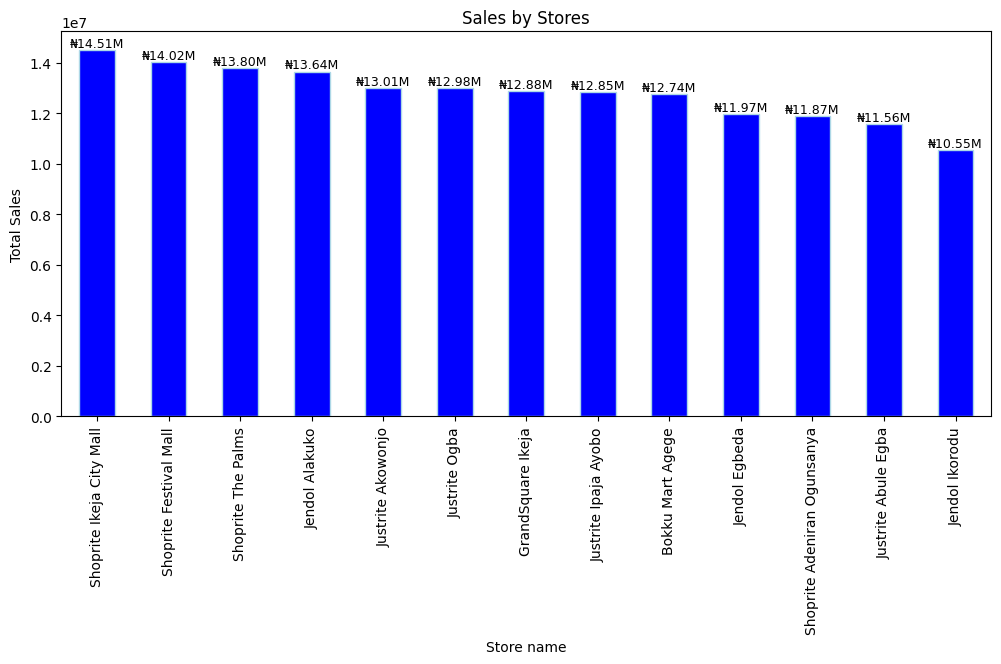

In [41]:
store_sales = (
    data.groupby("store_name")["total_sales"].sum().sort_values(ascending = False))

for store, total_sales in store_sales.items():
    print(f"{store}: ₦{total_sales:,.0f}")

# Ploting of the chart
plt.figure(figsize = (12,5))
ax = store_sales.plot(kind = "bar", color="blue", edgecolor="lightblue")

plt.title("Sales by Stores")
plt.xlabel("Store name")
plt.ylabel("Total Sales")
plt.grid(False)

# Add labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,   
        p.get_height(),                 
        f"₦{p.get_height()/1_000_000:,.2f}M", 
        ha="center", va="bottom", fontsize=9
    )
plt.show()

### 2. Which GlowCare products are most profitable?

GlowCare Face Cream: ₦11,770,600
GlowCare Facial Cleanser: ₦10,643,000
GlowCare Body Lotion: ₦9,174,500
GlowCare Body Scrub: ₦9,088,200
GlowCare Shower Gel: ₦8,231,700


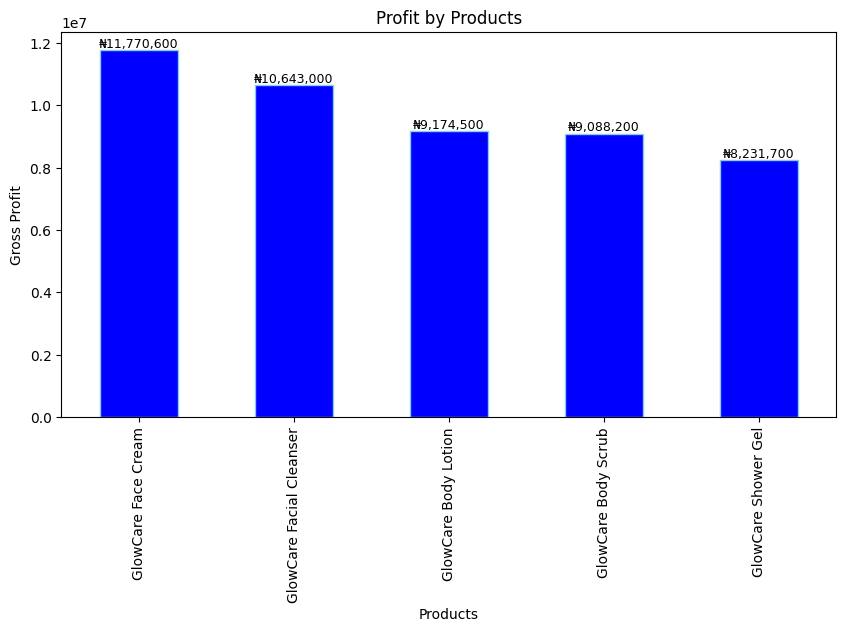

In [34]:
product_profit = (
    data.groupby("product_name")["gross_profit"].sum().sort_values(ascending=False))

### Listing out each product name with its gross profit
for product, gross_profit in product_profit.items():
    print(f"{product}: ₦{gross_profit:,.0f}")

# Plotting the chart
plt.figure(figsize=(10,5))
ax = product_profit.plot(kind="bar", color="blue", edgecolor="skyblue")

plt.title("Profit by Products")
plt.xlabel("Products")
plt.ylabel("Gross Profit")
plt.grid(False)

# Add labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,   # X position (center of bar)
        p.get_height(),                  # Y position (top of bar)
        f"₦{p.get_height():,.0f}",       # Label text with Naira symbol and commas
        ha="center", va="bottom", fontsize=9
    )
plt.show()

### 3. Which product category drives the most revenue?

Skin Care: ₦73,999,500
Body Care: ₦65,486,700
Bath Care: ₦26,876,300


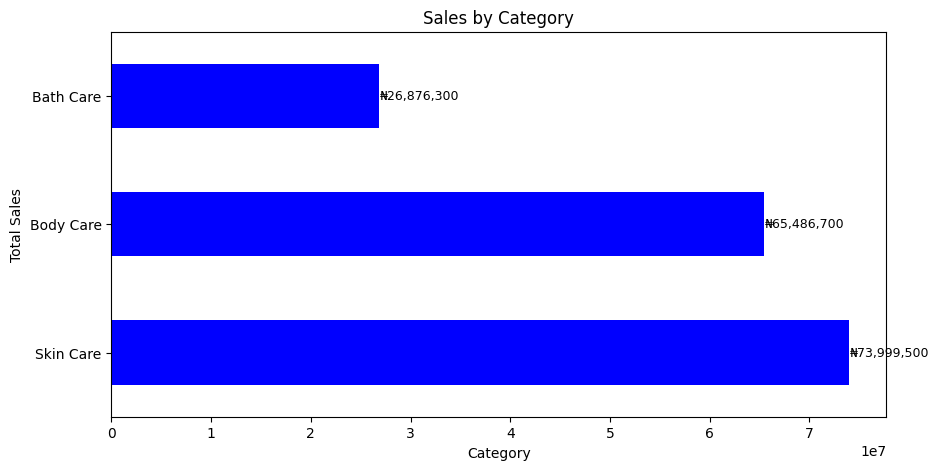

In [50]:
category_sales = (
    data.groupby("category")["total_sales"].sum().sort_values(ascending=False))

### Listing out each category with its sales
for category, total_sales in category_sales.items():
    print(f"{category}: ₦{total_sales:,.0f}")

# Plotting the chart
plt.figure(figsize=(10,5))
ax = category_sales.plot(kind="barh", color="blue")

plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.grid(False)

# Add labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_width(),                   
        p.get_y() + p.get_height()/2,    
        f"₦{p.get_width():,.0f}",        
        ha="left", va="center", fontsize=9
    )
plt.show()

### 4. How do sales trend over time (monthly & yearly)?

<Figure size 1200x800 with 0 Axes>

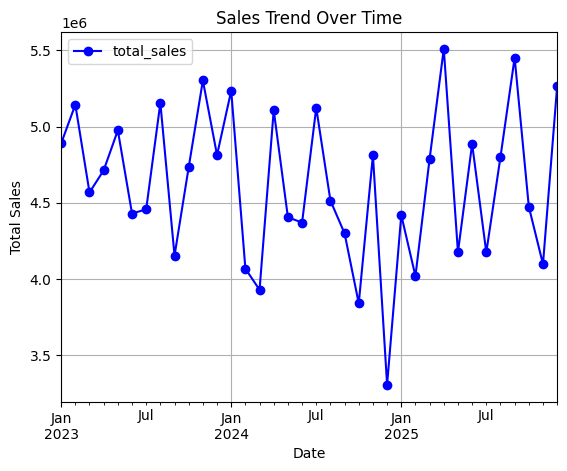

In [48]:
monthly_sales["date"] = pd.to_datetime(
    monthly_sales["year"].astype(str) + "-" + monthly_sales["month"].astype(str))

# Plotting the chart
plt.figure(figsize=(12,8))
ax = monthly_sales.plot(kind="line", x="date", y="total_sales", color="blue", 
    marker="o", linestyle="solid")

plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

### 5. Which Lagos locations perform best?

Ikorodu: ₦10,549,400
Abule Egba: ₦11,556,500
Surulere: ₦11,871,800
Egbeda: ₦11,965,800
Agege: ₦12,744,500
Ipaja: ₦12,847,100
Ogba: ₦12,975,900
Akowonjo: ₦13,005,100
Alakuko: ₦13,645,000
Lekki: ₦13,795,100
Festac: ₦14,015,100
Ikeja: ₦27,391,200


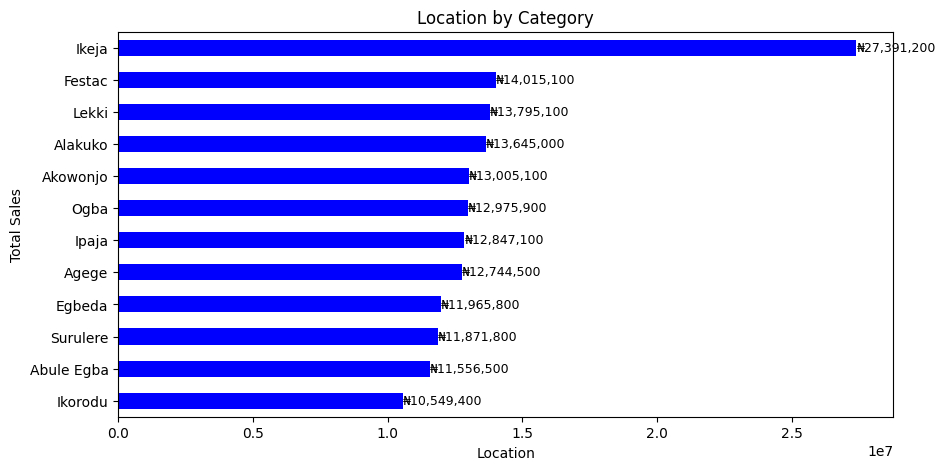

In [54]:
location_sales = (
    data.groupby("location")["total_sales"].sum().sort_values(ascending=True))

### Listing out each category with its sales
for location, total_sales in location_sales.items():
    print(f"{location}: ₦{total_sales:,.0f}")

# Plotting the chart
plt.figure(figsize=(10,5))
ax = location_sales.plot(kind="barh", color="blue")

plt.title("Location by Category")
plt.xlabel("Location")
plt.ylabel("Total Sales")
plt.grid(False)

# Add labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_width(),                   
        p.get_y() + p.get_height()/2,    
        f"₦{p.get_width():,.0f}",        
        ha="left", va="center", fontsize=9)
plt.show()

### 6. Do discounts actually increase sales volume?

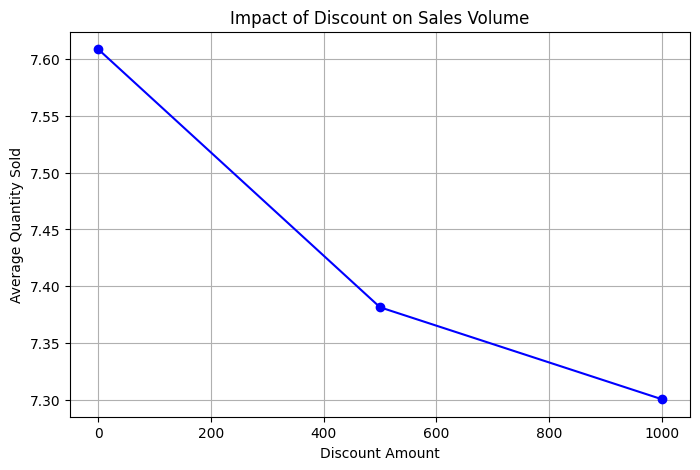

In [60]:
discounted_sales = (
    data.groupby("discount_amount")[["quantity", "total_sales"]]
        .mean().sort_values(by="discount_amount", ascending=True))

# Plotting the chart
plt.figure(figsize=(8,5))
plt.plot(
    discounted_sales.index, 
    discounted_sales["quantity"], 
    color="blue", marker="o", linestyle="solid")

plt.title("Impact of Discount on Sales Volume")
plt.xlabel("Discount Amount")
plt.ylabel("Average Quantity Sold")
plt.grid(True)
plt.show()


             CONCLUSION: Higher Discount do not lead to sales volume.
             discount amount increases, the average quantity sold actually decreases


### 7. Which stores have high sales but low profitability?

In [68]:
store_performance = (
    data.groupby("store_name")[["total_sales", "gross_profit"]].sum())

# creating a new column called profit_margin
store_performance["profit_margin"] = (
    store_performance["gross_profit"] / store_performance["total_sales"])*100
store_performance["profit_margin"] = store_performance["profit_margin"].round(2)
store_performance.sort_values("profit_margin").head(10)


,total_sales,gross_profit,profit_margin
store_name,,,
Jendol Ikorodu,10549400,3085900,29.25
Shoprite Adeniran Ogunsanya,11871800,3475700,29.28
Jendol Alakuko,13645000,4000500,29.32
Shoprite Festival Mall,14015100,4113000,29.35
Shoprite The Palms,13795100,4052500,29.38
Shoprite Ikeja City Mall,14506800,4264000,29.39
Justrite Ogba,12975900,3816700,29.41
Justrite Akowonjo,13005100,3826600,29.42
Bokku Mart Agege,12744500,3750800,29.43


In conclusion, the data shows that all stores operate with remarkably consistent profit margins around 29%, indicating strong cost control and standardized pricing strategies across locations.


### 8. What payment method is most commonly used?

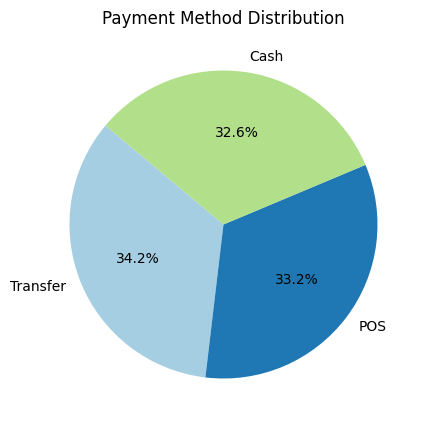

In [82]:
payment = data["payment_method"].value_counts(normalize=True) *100
payment

plt.figure(figsize=(8,5))
plt.pie(payment, labels=payment.index, autopct='%1.1f%%', # show percentages with 1 decimal place
    startangle=140,      # rotate start for better layout
    colors=plt.cm.Paired.colors)

plt.title("Payment Method Distribution")
plt.axis('off')  
plt.show()

### 9. Which products has the most quantity?

GlowCare Body Scrub: 7,896
GlowCare Face Cream: 7,591
GlowCare Body Lotion: 7,355
GlowCare Facial Cleanser: 7,351
GlowCare Shower Gel: 7,171


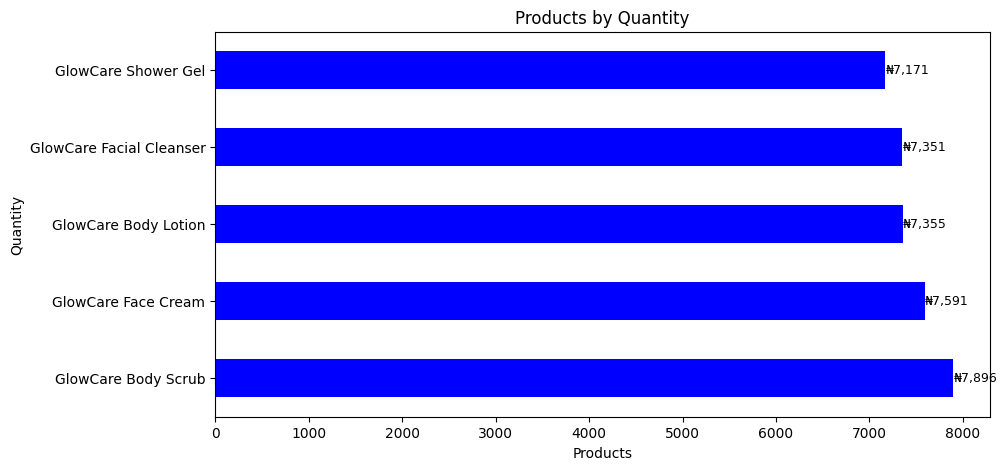

In [85]:
top_vol_products = (
    data.groupby("product_name")["quantity"].sum().sort_values(ascending=False))

### Listing out each product with its quantity
for product, quantity in top_vol_products.items():
    print(f"{product}: {quantity:,.0f}")

# Plotting the chart
plt.figure(figsize=(10,5))
ax = top_vol_products.plot(kind="barh", color="blue")

plt.title("Products by Quantity")
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.grid(False)

# Add labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_width(),                   
        p.get_y() + p.get_height()/2,    
        f"₦{p.get_width():,.0f}",        
        ha="left", va="center", fontsize=9)
plt.show() 

### 10. Year-on-Year growth analysis

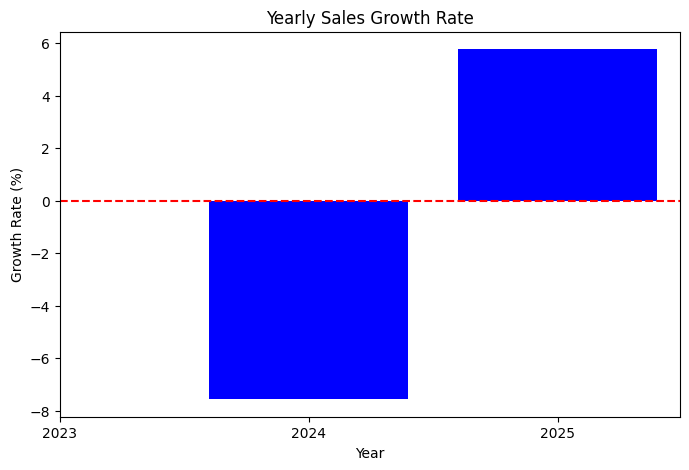

In [97]:
# creating a year column
data["year"] = data["sale_date"].dt.year

yearly_sales = data.groupby("year")["total_sales"].sum()
growth_rate = yearly_sales.pct_change() * 100
growth_rate

# plot the chart
plt.figure(figsize=(8,5))
plt.bar(growth_rate.index, growth_rate, color="blue")
plt.title("Yearly Sales Growth Rate")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.xticks(ticks=growth_rate.index, labels=growth_rate.index.astype(int)) # converting deccimal to integer
plt.axhline(0, color="red", linestyle="--") 
plt.show()

CONCLUSION: 2023 serves as the baseline year with no growth rate to compare against. Sales dipped by about 8% in 2024, reflecting a tough period, but bounced back with a 5% increase in 2025.

### 11. What is the average order value per store (aov)

In [100]:
 aov = (
     data.groupby("store_name")["total_sales"].mean().sort_values(ascending=False))

# Round up the value and added Naira symbol
aov_fmt = aov.apply(lambda x: f"₦{round(x):,}")
aov_fmt

store_name
Shoprite The Palms             ₦35,192
Shoprite Ikeja City Mall       ₦34,376
GrandSquare Ikeja              ₦33,996
Jendol Alakuko                 ₦33,859
Shoprite Festival Mall         ₦33,853
Bokku Mart Agege               ₦33,450
Jendol Egbeda                  ₦33,238
Shoprite Adeniran Ogunsanya    ₦33,161
Justrite Ipaja Ayobo           ₦32,857
Justrite Ogba                  ₦32,685
Justrite Abule Egba            ₦32,191
Justrite Akowonjo              ₦31,875
Jendol Ikorodu                 ₦31,397
Name: total_sales, dtype: object

CONCLUSION: Shoprite The Palms leads with the highest average order value of ₦35,192, suggesting that customers tend to spend more per transaction there than at other locations.

### Thank you